Load digits datasets

classify digits (0-9) using knn classifier.you can use different values for k neighbours and need to figure out a value of k 
that gives you a maximum score.use can manually try different values of k or use grid search cv
plot confussion metrix
plot classification report

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
from sklearn.datasets import load_digits

In [35]:
digits=load_digits()

In [36]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [37]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [38]:
digits['feature_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [39]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
df=pd.DataFrame(digits['data'],columns=digits['feature_names'])

In [41]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [42]:
scaler.fit(df)

StandardScaler()

In [43]:
scaler_feat=scaler.transform(df)

In [44]:
df=pd.DataFrame(scaler_feat,columns=df.columns)

In [45]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [46]:
df['Target']=digits['target']

In [47]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,0
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,1
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,2
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,3
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008,9
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008,0
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008,8
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008,9


Evaluation

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=df.drop(['Target'],axis=1)
y=df['Target']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [51]:
len(x_train)

1257

In [52]:
len(x_test)

540

KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
knn.score(x_test,y_test)

0.9629629629629629

By using verious k_neighbors

In [58]:
Error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    Error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'ERROR_RATE')

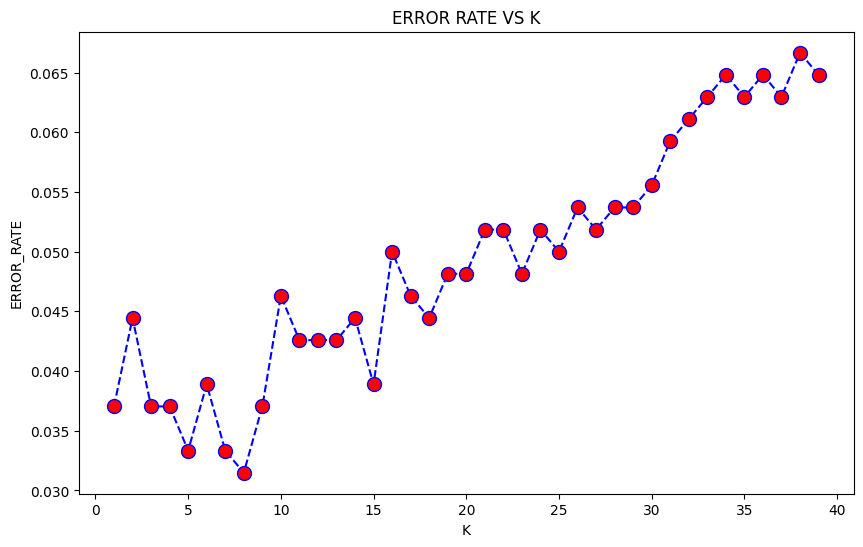

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS K')
plt.xlabel('K')
plt.ylabel("ERROR_RATE")

By using gridSearchcv

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
knn=KNeighborsClassifier()
prem_grid={
    'n_neighbors':[1,3,5,7,9,11]
}

In [63]:
grid=GridSearchCV(knn,prem_grid,cv=5,return_train_score=False)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [64]:
grid.best_params_

{'n_neighbors': 3}

In [65]:
grid.best_score_

np.float64(0.9705590337064441)